# Goal
Problem statement (Term
Deposit Sale)
Using the data collected from existing customers, build a model that will help the marketing
team identify potential customers who are relatively more likely to subscribe to term
deposits and thus increase their hit ratio.

## Attribute information
Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has a housing loan?
7. loan: has personal loan?
8. balance in account

Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
Important Note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call is
performed. Also, after the end of the call y is obviously known. Thus, this
input should only be included for benchmark purposes and should be
discarded if the intention is to have a realistic predictive model.

Other attributes:
13. campaign: number of contacts performed during this campaign and for
this client
14. pdays: number of days that passed by after the client was last contacted from
a previous campaign (-1 tells us the person has not been contacted or contact
period is beyond 900 days)
15. previous: number of times the client has been contacted before for the
last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign

Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

# Import modules and load the data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas_profiling
import graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc


from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from IPython.display import Image 
from os import system


In [2]:
df=pd.read_csv( "bank-full.csv" )
df.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [3]:
df.head(10).T

0           1             2            3        4  \
age                58          44            33           47       33   
job        management  technician  entrepreneur  blue-collar  unknown   
marital       married      single       married      married   single   
education    tertiary   secondary     secondary      unknown  unknown   
default            no          no            no           no       no   
balance          2143          29             2         1506        1   
housing           yes         yes           yes          yes       no   
loan               no          no           yes           no       no   
contact       unknown     unknown       unknown      unknown  unknown   
day                 5           5             5            5        5   
month             may         may           may          may      may   
duration          261         151            76           92      198   
campaign            1           1             1            1        1   
pdays              -1          -1            -1           -1       -1   
previous            0           0             0            0        0   
poutcome      unknown     unknown       unknown      unknown  unknown   
Target             no          no            no           no       no   

                    5           6             7        8           9  
age                35          28            42       58          43  
job        management  management  entrepreneur  retired  technician  
marital       married      single      divorced  married      single  
education    tertiary    tertiary      tertiary  primary   secondary  
default            no          no           yes       no          no  
balance           231         447             2      121         593  
housing           yes         yes           yes      yes         yes  
loan               no         yes            no       no          no  
contact       unknown     unknown       unknown  unknown     unknown  
day                 5           5             5        5           5  
month             may         may           may      may         may  
duration          139         217           380       50          55  
campaign            1           1             1        1           1  
pdays              -1          -1            -1       -1          -1  
previous            0           0             0        0           0  
poutcome      unknown     unknown       unknown  unknown     unknown  
Target             no          no            no       no          no

# Univariate Analysis

In [4]:
df.shape

(45211, 17)

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

## Pandas Profiling 


In [10]:
import pandas_profiling
df.profile_report()

**Insight:**
- previous is highly skewed (γ1 = 41.84645447)
- balance has 3514 (7.8%) zeros
- previous has 36954 (81.7%) zeros


**Insight:**
- It got 7 numeric variables: ‘Age’, ‘balance’, ‘day’, ‘duration’, ‘campaign’, ‘pdays’, ‘previous’
- It got 6 categorical variables: ‘job’, ‘marital’,'education', 'month','contact','poutcome'
- It got 4 Boolean variables: ‘default’, ‘housing’, ‘loan’, ‘Target’

## EDA data preprocessing

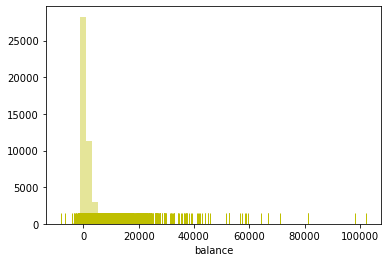

In [11]:
sns.distplot(df['balance'], kde=False, rug=True, color='y');

**insight**
- Balance data Skewed in right

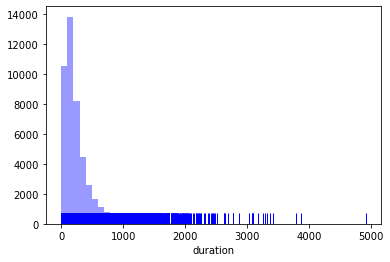

In [12]:
sns.distplot(df['duration'], kde=False, rug=True, color='b');

**insight**
- duration data Skewed in right

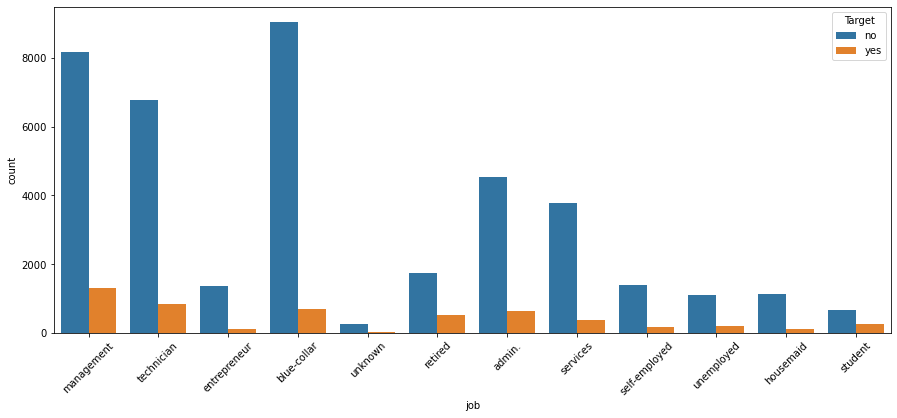

In [13]:
# 1.Type of Job
plt.figure(figsize=(15,6))
ax=sns.countplot(x='job',data=df, hue='Target')
plt.setp(ax.get_xticklabels(), rotation=45);



**insight**
- Highest customers profession with term deposit: management

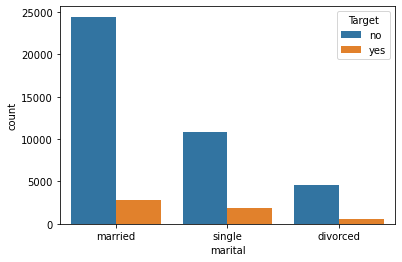

In [14]:
# 2.Marital status
sns.countplot(x='marital', data=df, hue='Target');

**insight**
- married customers have more approvals for term than single and divorced

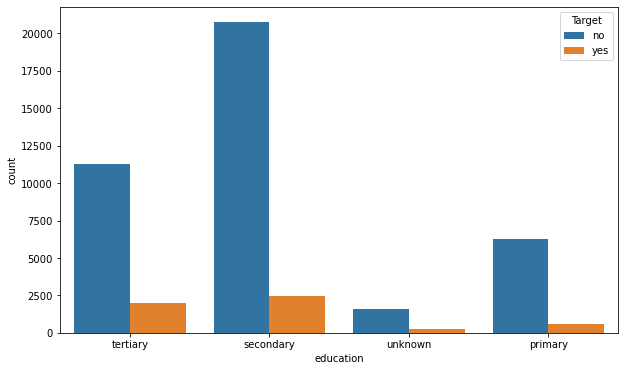

In [15]:
# 3. education
plt.figure(figsize=(10,6))
sns.countplot(x='education',data=df, hue = 'Target');

**insight**
- Customer with secondary education has more approvals for Term depoit

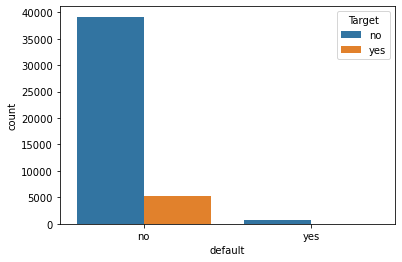

In [16]:
# 4.Credit default 
sns.countplot(x='default', data=df, hue ='Target')


**insight**
- Customers with no credit default that have more term deposit

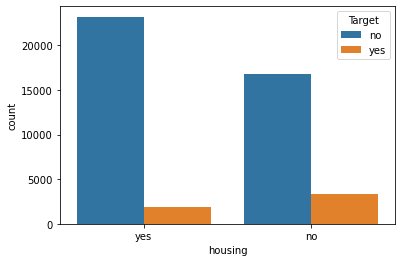

In [17]:
# 5.Housing loan analysis
sns.countplot(x='housing', data=df, hue='Target');

**insight**
- Customer without having housing loan has more approvals for Term deposit

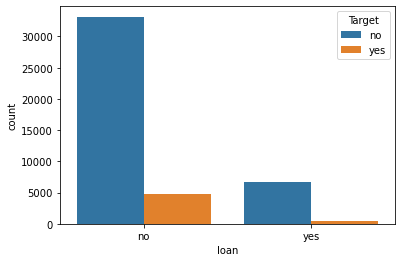

In [18]:
# 6.Customers with personal Loan
sns.countplot(x='loan', data=df, hue='Target');

**insight**
- Customer without having personal loan has more approvals for Term deposit

## Outlier Processing

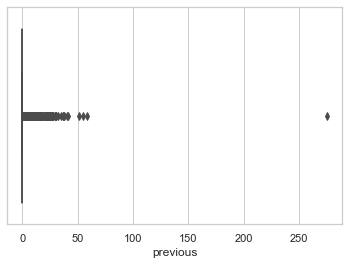

In [19]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.previous)

In [20]:
# replacing the outlayes data higher than 250 by the median value
df.loc[df.previous > 250] = df.previous.median()

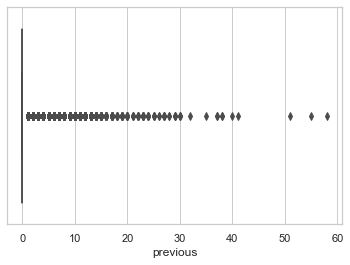

In [21]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.previous)

In [22]:
# mean values respect to Target
round(df.groupby('Target').mean(),2)

age  balance    day  duration  campaign  pdays  previous
Target                                                            
0.0      0.00     0.00   0.00      0.00      0.00   0.00      0.00
no      40.84  1303.73  15.89    221.18      2.85  36.42      0.50
yes     41.67  1804.27  15.16    537.29      2.14  68.70      1.17

**insight**

- Customer with long term deposit have higher average age, balance account, and were contacted for longer duration compared with customers that don't have long term deposit.
- Customer with no long term deposit have more housing loan, personal loan, and credit default than customer with long term deposit.

# Multivariate analysis

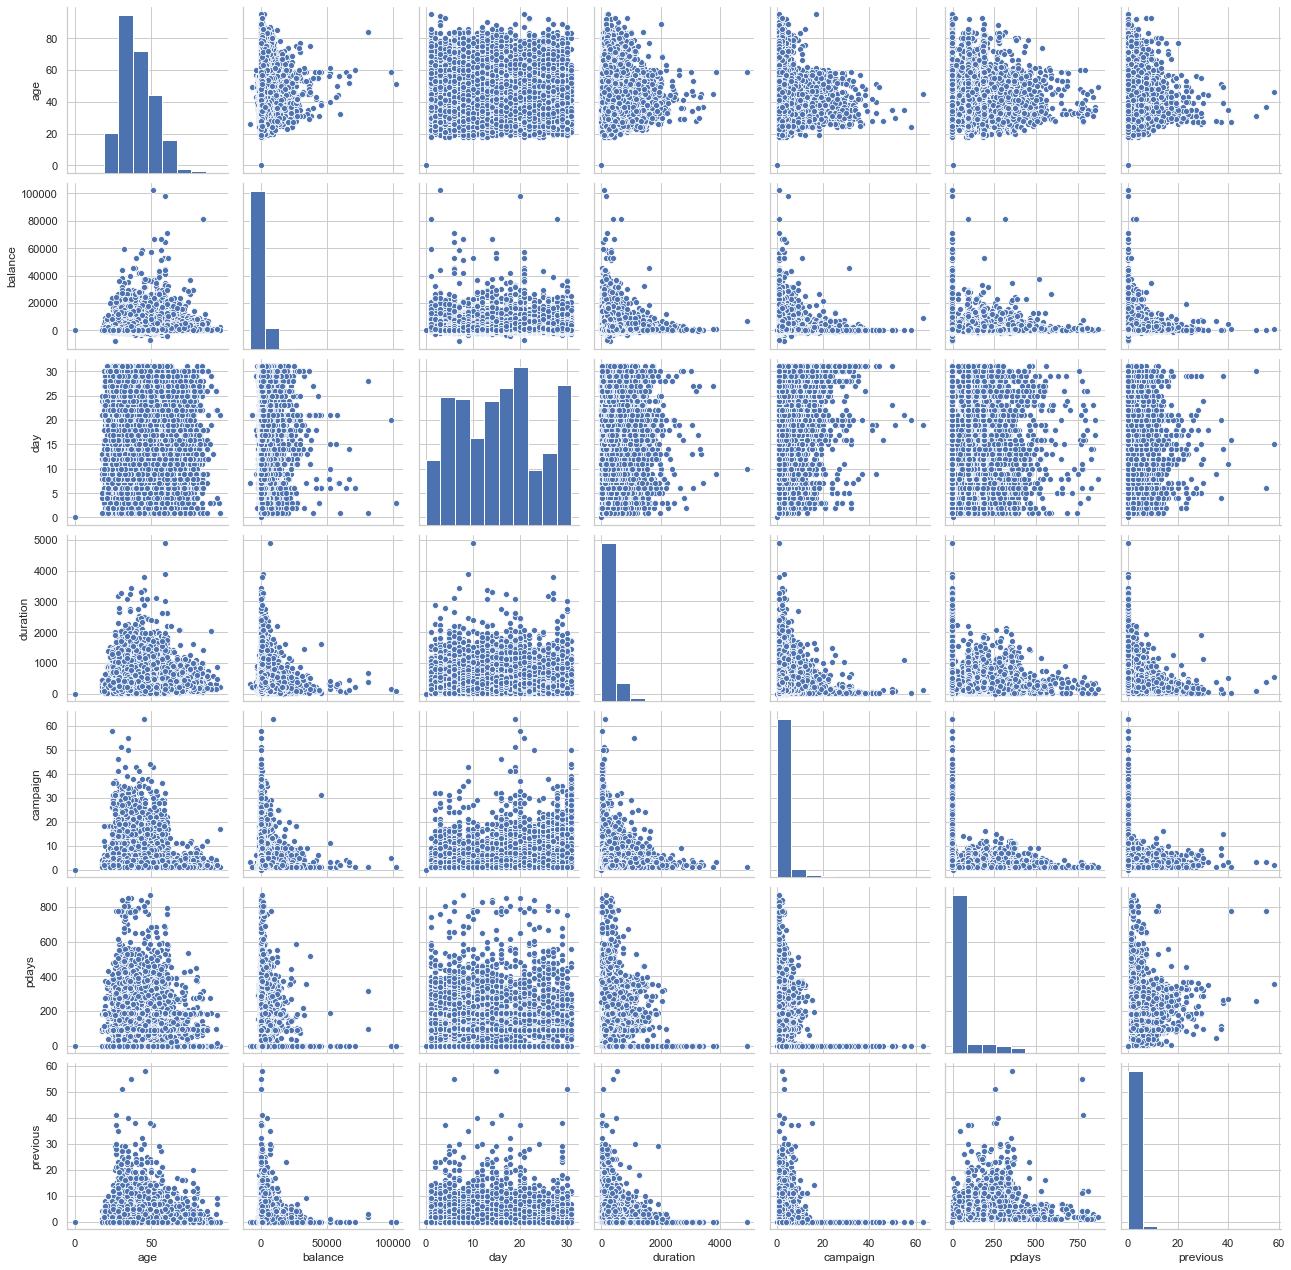

In [23]:
sns.pairplot(df.select_dtypes(exclude ='object'));

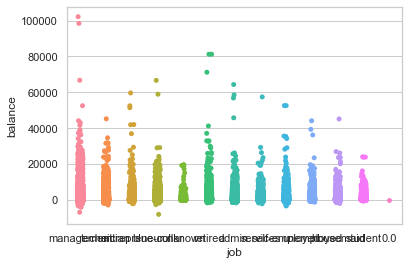

In [24]:
sns.stripplot(df['job'], df['balance'], jitter=True);

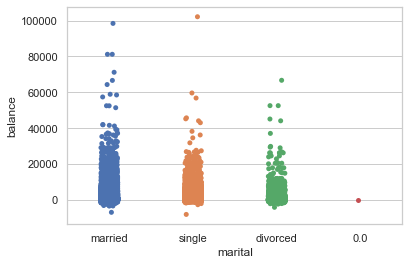

In [25]:
sns.stripplot(df['marital'], df['balance'], jitter=True);

In [26]:
df.corr()

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097804 -0.008960 -0.004561  0.004835 -0.023717  0.001861
balance   0.097804  1.000000  0.004511  0.021572 -0.014571  0.003453  0.020989
day      -0.008960  0.004511  1.000000 -0.030151  0.162516 -0.092950 -0.057140
duration -0.004561  0.021572 -0.030151  1.000000 -0.084546 -0.001573  0.000337
campaign  0.004835 -0.014571  0.162516 -0.084546  1.000000 -0.088612 -0.038876
pdays    -0.023717  0.003453 -0.092950 -0.001573 -0.088612  1.000000  0.542093
previous  0.001861  0.020989 -0.057140  0.000337 -0.038876  0.542093  1.000000

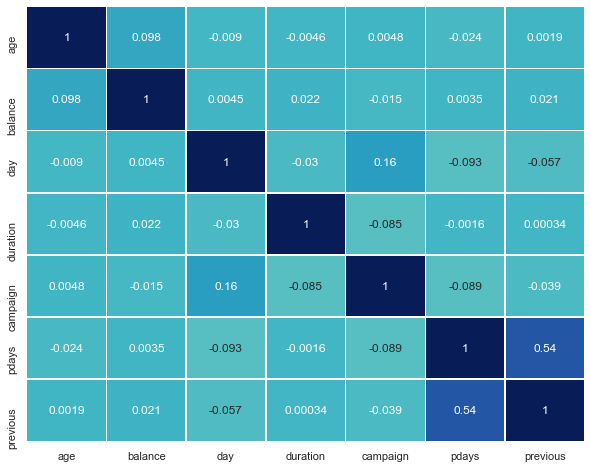

In [27]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

# Prepare the data for analytics

## Handling non-numeric(Categorical) data

In [28]:
print(df.job.value_counts())
print(df.marital.value_counts())
print(df.education.value_counts())
print(df.default.value_counts())
print(df.housing.value_counts())
print(df.loan.value_counts())
print(df.contact.value_counts())
print(df.month.value_counts())
print(df.poutcome.value_counts())

blue-collar      9732
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
0.0                 1
Name: job, dtype: int64
married     27213
single      12790
divorced     5207
0.0             1
Name: marital, dtype: int64
secondary    23202
tertiary     13300
primary       6851
unknown       1857
0.0              1
Name: education, dtype: int64
no     44395
yes      815
0.0        1
Name: default, dtype: int64
yes    25129
no     20081
0.0        1
Name: housing, dtype: int64
no     37966
yes     7244
0.0        1
Name: loan, dtype: int64
cellular     29284
unknown      13020
telephone     2906
0.0              1
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2648
jan     1403
oct      738
sep      579
mar      477
dec      214
0.0    

## One Hot Encoding

In [29]:
replaceStruct = {
                 "marital":  {"single": 1,"married": 2,  "divorced": 3 },
                 "education": {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":-1},
                 "contact": {"cellular": 1, "telephone": 2 ,"unknown": -1 },
                 "month": {"jan":1, "feb":2 , "mar":3, "apr": 4,"may":5,"jun":6, "jul":7 , "aug": 8, "sep": 9,"oct": 10, "nov": 11,"dec": 12},
                 "poutcome": {"success": 1, "failure": 2 ,"other": 3 ,"unknown": -1 },
                  "Target": {"no": 0, "yes": 1 }
                 }
                 

oneHotCols=["job","default","housing","loan"]



In [30]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

age  marital  education  balance  contact  day  month  duration  campaign  \
0  58.0      2.0        3.0   2143.0     -1.0  5.0    5.0     261.0       1.0   
1  44.0      1.0        2.0     29.0     -1.0  5.0    5.0     151.0       1.0   
2  33.0      2.0        2.0      2.0     -1.0  5.0    5.0      76.0       1.0   
3  47.0      2.0       -1.0   1506.0     -1.0  5.0    5.0      92.0       1.0   
4  33.0      1.0       -1.0      1.0     -1.0  5.0    5.0     198.0       1.0   
5  35.0      2.0        3.0    231.0     -1.0  5.0    5.0     139.0       1.0   
6  28.0      1.0        3.0    447.0     -1.0  5.0    5.0     217.0       1.0   
7  42.0      3.0        3.0      2.0     -1.0  5.0    5.0     380.0       1.0   
8  58.0      2.0        1.0    121.0     -1.0  5.0    5.0      50.0       1.0   
9  43.0      1.0        2.0    593.0     -1.0  5.0    5.0      55.0       1.0   

   pdays  ...  job_unknown  default_0.0  default_no  default_yes  housing_0.0  \
0   -1.0  ...            0            0           1            0            0   
1   -1.0  ...            0            0           1            0            0   
2   -1.0  ...            0            0           1            0            0   
3   -1.0  ...            0            0           1            0            0   
4   -1.0  ...            1            0           1            0            0   
5   -1.0  ...            0            0           1            0            0   
6   -1.0  ...            0            0           1            0            0   
7   -1.0  ...            0            0           0            1            0   
8   -1.0  ...            0            0           1            0            0   
9   -1.0  ...            0            0           1            0            0   

   housing_no  housing_yes  loan_0.0  loan_no  loan_yes  
0           0            1         0        1         0  
1           0            1         0        1         0  
2           0            1         0        0         1  
3           0            1         0        1         0  
4           1            0         0        1         0  
5           0            1         0        1         0  
6           0            1         0        0         1  
7           0            1         0        1         0  
8           0            1         0        1         0  
9           0            1         0        1         0  

[10 rows x 35 columns]

In [31]:
df.dtypes

age                  float64
marital              float64
education            float64
balance              float64
contact              float64
day                  float64
month                float64
duration             float64
campaign             float64
pdays                float64
previous             float64
poutcome             float64
Target               float64
job_0.0                uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
default_0.0            uint8
default_no             uint8
default_yes            uint8
housing_0.0            uint8
housing_no             uint8
housing_yes            uint8
loan_0.0               uint8
loan_no                uint8
loan_yes      

## Split Data

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop('Target',axis=1)  #set of independent variable
Y = df['Target']   #set of dependent variable
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [33]:
x_train.shape, x_test.shape

((31647, 34), (13564, 34))

In [34]:
# Check Split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


## Build Logistics Regression Model

In [35]:
# Fit the model on train dataset
LRmodel = LogisticRegression(solver="liblinear")
LRmodel.fit(x_train, y_train)


#predict on test
y_predict = LRmodel.predict(x_test)

coef_df = pd.DataFrame(LRmodel.coef_)
coef_df['intercept'] = LRmodel.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.007668 -0.143691  0.109186  0.000023  0.496512 -0.006596 -0.003249   

          7         8        9  ...   25        26        27   28        29  \
0  0.004103 -0.139962  0.00124  ...  0.0 -0.734952 -0.504477  0.0 -0.170765   

         30   31        32        33  intercept  
0 -1.068664  0.0 -0.284703 -0.954726  -1.239428  

[1 rows x 35 columns]


### Model Accuracy

In [36]:
print("Trainig accuracy",LRmodel.score(x_train,y_train))  
print()
print("Testing accuracy",LRmodel.score(x_test, y_test))

Trainig accuracy 0.8912693146269789

Testing accuracy 0.8902241226776763


**Insight:**
The Model score shows that 89% of the time the model is correct

### Classification report-Precision ,Recall, F1 Score, support

In [37]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     12013
         1.0       0.55      0.21      0.31      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.60      0.62     13564
weighted avg       0.87      0.89      0.87     13564



### Confusion Matrix

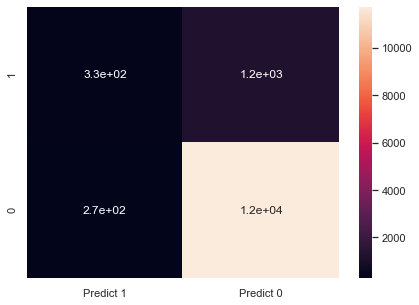

In [38]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### ROC AUC Score

In [39]:
from sklearn.metrics import roc_auc_score

print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Roc Auc Score: 0.5960706494463364


## Build Decision Tree Model

In [40]:
from sklearn.tree import DecisionTreeClassifier
df = DecisionTreeClassifier(criterion = 'gini', random_state=1)
df.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [41]:
print(df.score(x_train, y_train))
print(df.score(x_test, y_test))

1.0
0.8743733411972869


## Reducing over fitting (Regularization)

In [42]:
df = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
df.fit(x_train, y_train)
print(df.score(x_train, y_train))
print(df.score(x_test, y_test))

0.8954087275255158
0.8973016809200826


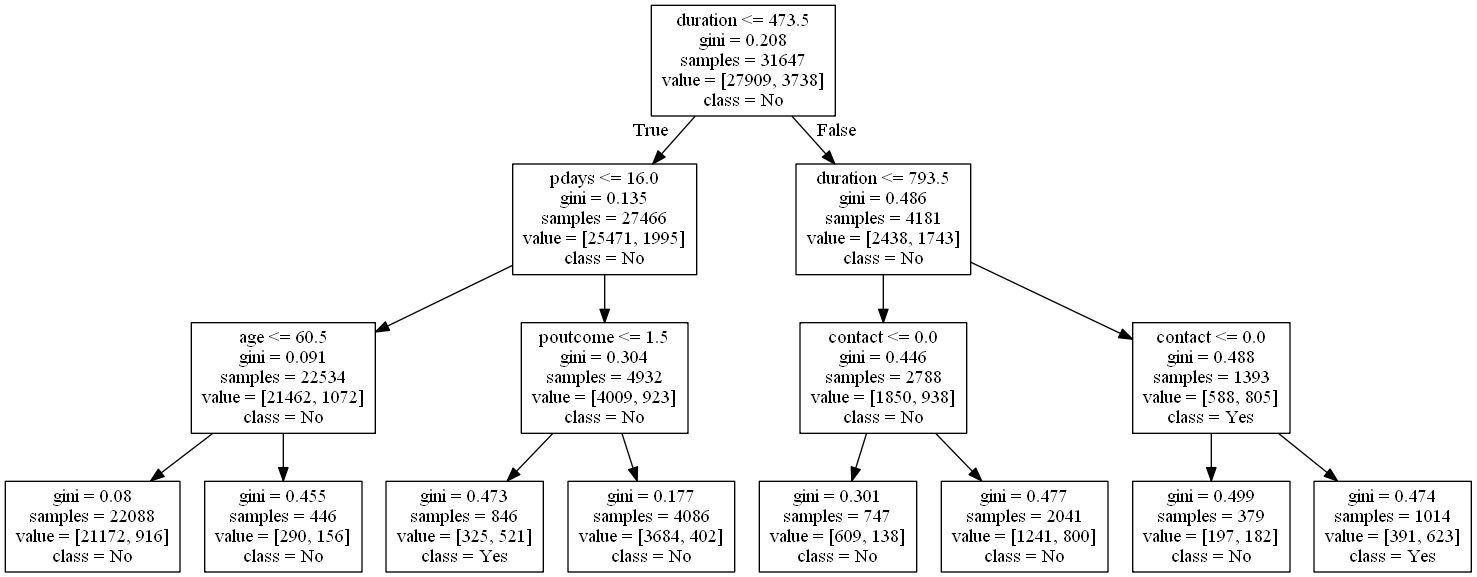

In [43]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(df, out_file=Credit_Tree_FileR, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))

# Create the ensemble model

## Ensemble Learning - Bagging

In [68]:
bgcl = BaggingClassifier(base_estimator=df, n_estimators=50,random_state=1)
bgcl = bgcl.fit(x_train, y_train)


0.8910165260530224


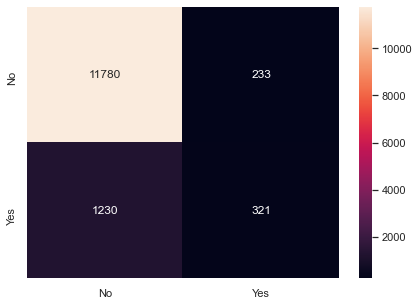

In [70]:
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_train , y_train))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Ensemble Learning - AdaBoosting

In [46]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(x_train, y_train)


0.8849896785608965


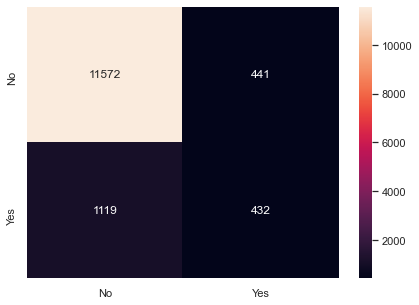

In [47]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Ensemble Learning - GradientBoost

In [48]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

0.9003243880861103


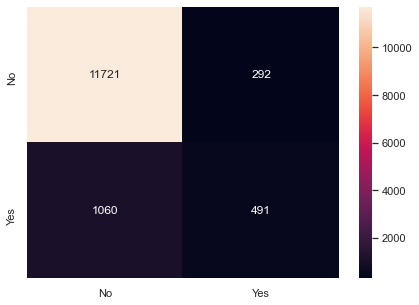

In [49]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Ensemble RandomForest Classifier

In [50]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)

0.9071070480684164


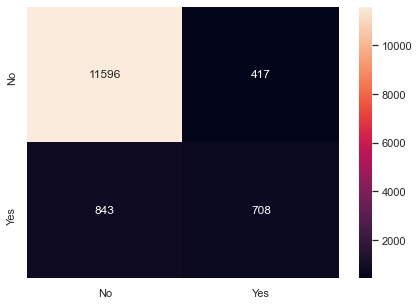

In [51]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Conclusion

In [72]:
Model_Selection = pd.DataFrame({"LogisticsRegression":['0.8912693146269789'],
                                "DecisionFitTree":['0.8954087275255158'],
                                "Bagging":['0.8921409613683279'],
                                "AdaBoosting":['0.8849896785608965'],
                                "GradientBoost":['0.9003243880861103'],
                                "RandomForest":['0.9071070480684164']}
                    ,index=['ModelScore']).T
Model_Selection 

ModelScore
LogisticsRegression  0.8912693146269789
DecisionFitTree      0.8954087275255158
Bagging              0.8921409613683279
AdaBoosting          0.8849896785608965
GradientBoost        0.9003243880861103
RandomForest         0.9071070480684164

**Final Observations**

- 1.The best 2 performance models: GradientBoost and RandomForest.
- 2.The lowest performing model: AdaBoost.
- 3."rou_auc" was used as scoring reference,Roc Auc Score: 0.5960706494463364
- 4.Score train is slightly higher than Score_Test (Aveg. Score test using all the models =89%)
- 5.There is not much difference using Bagging or using Decision Tree Classifier
- 6.Algorit shows a better performance in this order:
- (1) RandomForest (2) Gradient Boost (3) Decision Tree-Overfit, (4) Bagging, (5)Logistics Regression 
  (6) AdaBoosting
